In [1]:
#Chargement des modules commun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  

In [2]:
def transformLabelIntoBinary(df: pd.DataFrame , targetedColumn='revenue') -> pd.DataFrame:
    targetedMean = df[targetedColumn].mean()
    new_df = df
    new_df[targetedColumn] = np.where( df[targetedColumn] > targetedMean , 1 , 0)
    return new_df

def getStartifiedResampled(df: pd.DataFrame,number_samples=2000, targetedColumn='revenue') -> pd.DataFrame:
    resampled_df = resample(df, n_samples=number_samples, replace=False, stratify=df[targetedColumn], random_state=5)
    return resampled_df

def cvs_wrapper(model, X_data, Y_data, value_count, scenario):

    kfold = [3]

    for fold in kfold:

        scores =[]
        scores = cross_val_score(model, X_data, Y_data, cv=fold, scoring="precision")
        scores_recall = cross_val_score(model, X_data, Y_data, cv=fold, scoring="recall")
        scores_f1 = cross_val_score(model, X_data,Y_data,cv=fold, scoring="f1")
        scores_accuracy = cross_val_score(model, X_data,Y_data,cv=fold, scoring="accuracy")

        scores = pd.DataFrame(scores, columns=['precision'])
        scores['recall'] = scores_recall
        scores['F1'] = scores_f1
        scores['accuracy']=scores_accuracy

        print("Scores de validation croisée pour un échantillon de", value_count, "instances,", fold, "plis (folds), sur des données", scenario, ":")
        print(scores.sort_values(by=['F1'], ascending=False))
        print("\n")
        
def get_XY_separated(df: pd.DataFrame):
    return df.iloc[:,:-1],df['revenue']

def normalisation_data(df: pd.DataFrame):
    scaler = StandardScaler()  
    scaler.fit(df)  
    df = scaler.transform(df) 
    return df

data = pd.read_csv('devoir1_df.csv')
data = data.drop(['population', 'GDP_inhab'], axis=1)

data = transformLabelIntoBinary(data)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, 
                                       random_state=42)


### 1.1 - Vous devez donc déterminer la meilleure architecture du PMC en termes de nombre 
### de couches cachées et de nombre de neurones par couche cachée. Le nombre de 
### couches cachées ne doit pas dépasser 5 couches et le nombre de neurones par couche 
### cachée doit être entre 10 et 100 neurones. Cette architecture doit être la plus 
### performante en termes d’exactitude (accuracy). La fonction

In [3]:
# Echantillonnage aléatoire stratifié
sample_size = [2000, 4000, 8000]
train_set = pd.get_dummies(train_set[train_set.columns[:-1]])
train_set['revenue'] = data['revenue']
train_set = transformLabelIntoBinary(train_set)
 

train_set_R_samp1 = getStartifiedResampled(train_set,number_samples=sample_size[0])
train_set_R_samp2 = getStartifiedResampled(train_set,number_samples=sample_size[1])
train_set_R_samp3 = getStartifiedResampled(train_set,number_samples=sample_size[2])


In [4]:
# Validation croisée 

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd',random_state=42)

X_train_samp1, Y_train_samp1 = get_XY_separated(train_set_R_samp1)
X_train_samp2, Y_train_samp2 = get_XY_separated(train_set_R_samp2)
X_train_samp3, Y_train_samp3 = get_XY_separated(train_set_R_samp3)

X_train_samp1 = normalisation_data(X_train_samp1)
X_train_samp2 = normalisation_data(X_train_samp2)
X_train_samp3 = normalisation_data(X_train_samp3)

cvs_wrapper(clf, X_train_samp1, Y_train_samp1, sample_size[0], "scenario1")
cvs_wrapper(clf, X_train_samp2, Y_train_samp2, sample_size[1], "scenario1")
cvs_wrapper(clf, X_train_samp3, Y_train_samp3, sample_size[2], "scenario1")

D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Max

Scores de validation croisée pour un échantillon de 2000 instances, 3 plis (folds), sur des données scenario1 :
   precision    recall        F1  accuracy
0   0.759857  0.728522  0.743860  0.781109
2   0.754513  0.720690  0.737213  0.776276
1   0.779528  0.682759  0.727941  0.778111




D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Max

Scores de validation croisée pour un échantillon de 4000 instances, 3 plis (folds), sur des données scenario1 :
   precision    recall        F1  accuracy
2   0.754850  0.736661  0.745645  0.780945
0   0.769231  0.722892  0.745342  0.784858
1   0.746403  0.715517  0.730634  0.770443




D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Max

Scores de validation croisée pour un échantillon de 8000 instances, 3 plis (folds), sur des données scenario1 :
   precision    recall        F1  accuracy
2   0.761905  0.757967  0.759931  0.791448
1   0.782369  0.733219  0.756997  0.794901
0   0.776268  0.737522  0.756399  0.793026




D:\UQAC\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nous constatons que les meilleur résulats viennent du modèle avec les paramètres :

- 8000 instances
- 3 plis
- accuracy_score : 0.795
- F1 : 0.76
- recall : 0.73
- precision : 0.78

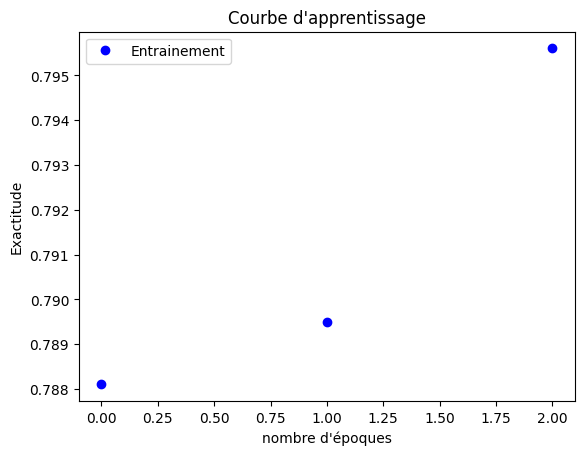

In [5]:


import matplotlib.pyplot as plt

plt.clf()
acc_values = [0.7881,0.7895,0.7956]

plt.plot([0,1,2], acc_values, 'bo', label='Entrainement')


plt.title('Courbe d\'apprentissage')
plt.xlabel('nombre d\'époques')
plt.ylabel('Exactitude')
plt.legend()
plt.show()

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from itertools import product
mlp = MLPClassifier(solver='sgd',random_state=42)
mlp.n_outputs_=2

hidden_layer_sizes = [(n,) for n in range(10, 101, 10)] 

all_hidden_layers = []

for num_layers in range(2, 6):
    for layers in product(hidden_layer_sizes, repeat=num_layers):
        flattened_layers = sum(layers, ())  
        if sum(flattened_layers) >= 20:  
            all_hidden_layers.append(flattened_layers)


all_hidden_layers



[(10, 10),
 (10, 20),
 (10, 30),
 (10, 40),
 (10, 50),
 (10, 60),
 (10, 70),
 (10, 80),
 (10, 90),
 (10, 100),
 (20, 10),
 (20, 20),
 (20, 30),
 (20, 40),
 (20, 50),
 (20, 60),
 (20, 70),
 (20, 80),
 (20, 90),
 (20, 100),
 (30, 10),
 (30, 20),
 (30, 30),
 (30, 40),
 (30, 50),
 (30, 60),
 (30, 70),
 (30, 80),
 (30, 90),
 (30, 100),
 (40, 10),
 (40, 20),
 (40, 30),
 (40, 40),
 (40, 50),
 (40, 60),
 (40, 70),
 (40, 80),
 (40, 90),
 (40, 100),
 (50, 10),
 (50, 20),
 (50, 30),
 (50, 40),
 (50, 50),
 (50, 60),
 (50, 70),
 (50, 80),
 (50, 90),
 (50, 100),
 (60, 10),
 (60, 20),
 (60, 30),
 (60, 40),
 (60, 50),
 (60, 60),
 (60, 70),
 (60, 80),
 (60, 90),
 (60, 100),
 (70, 10),
 (70, 20),
 (70, 30),
 (70, 40),
 (70, 50),
 (70, 60),
 (70, 70),
 (70, 80),
 (70, 90),
 (70, 100),
 (80, 10),
 (80, 20),
 (80, 30),
 (80, 40),
 (80, 50),
 (80, 60),
 (80, 70),
 (80, 80),
 (80, 90),
 (80, 100),
 (90, 10),
 (90, 20),
 (90, 30),
 (90, 40),
 (90, 50),
 (90, 60),
 (90, 70),
 (90, 80),
 (90, 90),
 (90, 100),
 

In [7]:
activation_options = ['tanh', 'relu']
solver_options = ['sgd', 'adam']
max_iter_options = [1000, 3500]
learning_rate_options = ['constant','adaptive']

parameter_space = {
        'hidden_layer_sizes': all_hidden_layers,
        'activation': activation_options,
        'solver': solver_options,
        'max_iter': max_iter_options,
        'learning_rate': learning_rate_options,
    }
    
clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X_train_samp3,Y_train_samp3 )

clf.best_params_

{'solver': 'adam',
 'max_iter': 3500,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (60, 80, 50, 100),
 'activation': 'tanh'}

In [8]:
# Test avec un jeu de test
test_set = pd.get_dummies(test_set[test_set.columns[:-1]])
test_set['revenue'] = data['revenue']
test_set = transformLabelIntoBinary(test_set)
X_test, y_test = get_XY_separated(test_set)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1152
           1       0.42      1.00      0.60       848

    accuracy                           0.42      2000
   macro avg       0.21      0.50      0.30      2000
weighted avg       0.18      0.42      0.25      2000



D:\UQAC\ML\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
D:\UQAC\ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\UQAC\ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\UQAC\ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


2.1.7 ********

Dans le devoir numéro 2 nous avions 0.62 en accuracy , ici l'accuracy est plus basse pour le classeur binaire , l'accuracy est à 0.42

### 1.2 - La fonction d’activation des neurones de la couche de sortie reste à déterminer par 
### vous

Vu que l'on utilise un classeur Binaire nous allons utiliser une régression logistique en fonction d'activation de sortie

In [9]:
clf.out_activation = 'logistic'